In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
warnings.filterwarnings('ignore')

In [3]:
x_train,y_train=pd.read_csv('../Data/processed_data/x_train.csv'), pd.read_csv('../Data/processed_data/y_train.csv')
x_test,y_test=pd.read_csv('../Data/processed_data/x_test.csv'), pd.read_csv('../Data/processed_data/y_test.csv')

In [4]:
model=Sequential()

model.add(Dense(600,activation='relu',name='layer1'))
model.add(Dense(600,activation='relu',name='layer2'))
model.add(Dense(600,activation='relu',name='layer3'))
model.add(Dense(600,activation='relu',name='layer4'))
model.add(Dense(1,name='layer5'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer4 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer5 (Dense)                       │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='mae',metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,batch_size=50,epochs=20)

Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0000e+00 - loss: 10632348.0000
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 3051349.7500
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 1345346.3750
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 1028230.7500
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 918901.8125
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0000e+00 - loss: 859138.9375
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: 822768.7500
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: 792573.4375
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: 778453.8125
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: 760710.8125
Epoch 11/20
121/121 ━━━━━━━━━━━━━━

In [8]:
train_pred=model.predict(x_train)
predictions=model.predict(x_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [9]:
r2_score(y_test,predictions), r2_score(y_train, train_pred)

(0.9590753526610664, 0.9566319677935091)

In [10]:
y_test[:10],predictions[:10]

(   TOTAL_PRICE
 0     23833612
 1      7968740
 2      9316303
 3      9795769
 4      6997612
 5      8881033
 6     10647894
 7      5641494
 8     11229326
 9     15640760,
 array([[22188676. ],
        [ 7081369. ],
        [ 9151209. ],
        [10287730. ],
        [ 7084935.5],
        [ 9539021. ],
        [10332275. ],
        [ 6870539.5],
        [ 9675596. ],
        [15278681. ]], dtype=float32))

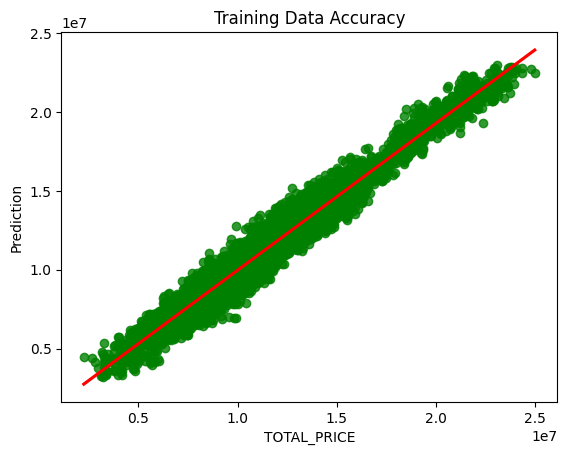

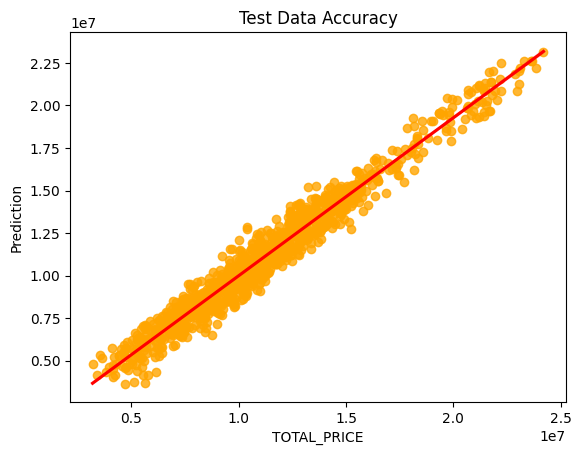

In [11]:
sns.regplot(x=y_train,y=train_pred,line_kws={'color':'red'},color="green")
plt.ylabel('Prediction')
plt.title("Training Data Accuracy")
plt.show()
sns.regplot(x=y_test,y=predictions,line_kws={'color':'red'},color="orange")
plt.ylabel('Prediction')
plt.title("Test Data Accuracy")
plt.show()

In [49]:
def build_model(hp):
    model=Sequential()
    for i in range(hp.Int('num_layers',2,6)):
        model.add(Dense(units=hp.Int('units'+str(i),min_value=32,max_value=700,step=32),activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(hp.Choice('learning_rate',[1e-1,1e-2,1e-3,1e-4])),loss='mean_absolute_error',
                 metrics=['mean_absolute_error'])
    return model

In [50]:
tuner=RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=7,
    executions_per_trial=1,
    directory='Project1',
    project_name='house_price_model'
)

In [51]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 700, 'step': 32, 'sampling': 'linear'}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 700, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [52]:
tuner.search(x_train,y_train,epochs=100,validation_data=[x_test,y_test])

Trial 7 Complete [00h 04m 05s]
val_mean_absolute_error: 614649.0

Best val_mean_absolute_error So Far: 549084.625
Total elapsed time: 00h 16m 57s


In [53]:
tuner.results_summary()

Results summary
Results in Project1\house_price_model
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 2
units0: 160
units1: 192
learning_rate: 0.1
units2: 224
Score: 549084.625

Trial 1 summary
Hyperparameters:
num_layers: 2
units0: 160
units1: 672
learning_rate: 0.1
units2: 608
Score: 557353.4375

Trial 0 summary
Hyperparameters:
num_layers: 3
units0: 480
units1: 448
learning_rate: 0.1
units2: 32
Score: 559459.75

Trial 5 summary
Hyperparameters:
num_layers: 5
units0: 672
units1: 672
learning_rate: 0.0001
units2: 352
units3: 608
units4: 192
units5: 160
Score: 613046.5

Trial 6 summary
Hyperparameters:
num_layers: 6
units0: 160
units1: 544
learning_rate: 0.0001
units2: 544
units3: 384
units4: 160
units5: 160
Score: 614649.0

Trial 3 summary
Hyperparameters:
num_layers: 6
units0: 256
units1: 288
learning_rate: 0.0001
units2: 320
units3: 32
units4: 32
units5: 32
Score: 730172.75

Trial 4 summary
Hyperparamete

In [54]:
tuner_model=tuner.get_best_models()[0]

In [55]:
output=tuner_model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [56]:
r2_score(y_test,output)

0.9739278961235387

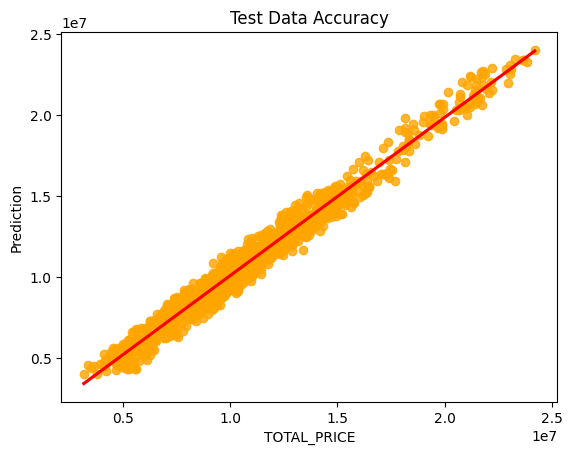

In [57]:
# sns.regplot(x=y_train,y=train_pred,line_kws={'color':'red'},color="green")
# plt.ylabel('Prediction')
# plt.title("Training Data Accuracy")
# plt.show()
sns.regplot(x=y_test,y=output,line_kws={'color':'red'},color="orange")
plt.ylabel('Prediction')
plt.title("Test Data Accuracy")
plt.show()

In [58]:
output[:10], y_test[:10]

(array([[23299144. ],
        [ 6986892. ],
        [ 9572957. ],
        [10047861. ],
        [ 6939348. ],
        [ 8646175. ],
        [10950659. ],
        [ 5843541.5],
        [10459483. ],
        [15606269. ]], dtype=float32),
    TOTAL_PRICE
 0     23833612
 1      7968740
 2      9316303
 3      9795769
 4      6997612
 5      8881033
 6     10647894
 7      5641494
 8     11229326
 9     15640760)